In [163]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

import numpy as np

In [3]:
milk = pd.read_csv('monthly-milk-production.csv', sep=';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='month'>

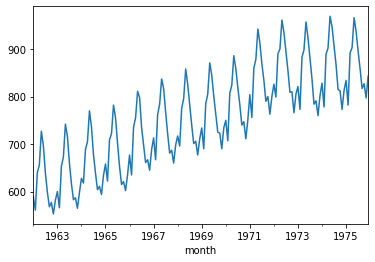

In [4]:
milk.milk.plot()

In [16]:
adf, p_value, used_lag, nobs, crit_values, _ = sm.tsa.stattools.adfuller(milk.milk)

In [18]:
round(p_value, 2)

0.63

In [29]:
milk2 = pd.DataFrame(milk.milk / milk.index.days_in_month, columns=['milk'])

In [144]:
milk2.reset_index(inplace=True)
milk2['milk_month'] = milk2.month.dt.month
milk2['is_apr'] = 0
idx = milk2[milk2.milk_month==4].index
milk2.loc[idx, 'is_apr'] = 1
milk2.set_index('month', inplace=True)

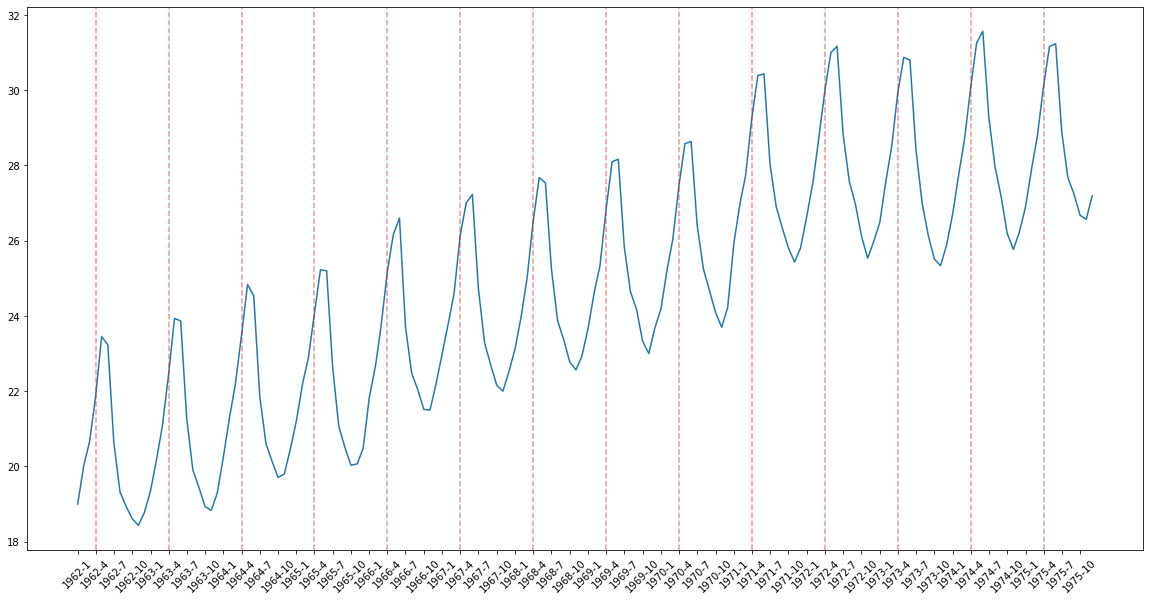

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(milk2.milk)

x = milk2.index
const_xticks = 3
ax.set_xticks(x[::const_xticks])
ax.set_xticklabels([f'{el.year}-{el.month}' for el in x[::const_xticks]], rotation=45)

for x, row in milk2[milk2.is_apr==1].iterrows():
    ax.axvline(x, linestyle='--', color='tab:red', alpha=.5)
plt.show()

In [33]:
round(milk2.milk.sum(), 2)

4166.33

2.280845551803768e-06


<AxesSubplot:xlabel='month'>

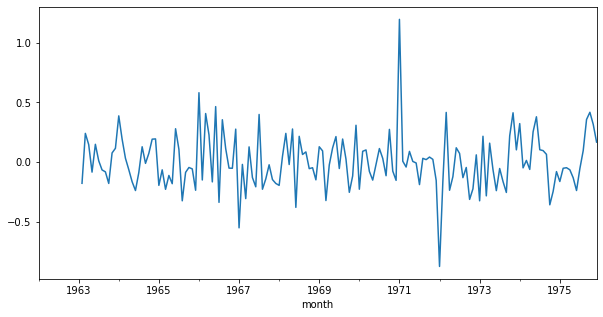

In [180]:
milk2['diff'] = np.nan
milk2['diff2'] = np.nan

milk2['diff'] = milk2.milk - milk2.milk.shift(12)
milk2['diff2'] = milk2['diff'] - milk2['diff'].shift(1)

adf, p_value, used_lag, nobs, crit_values, _ = sm.tsa.stattools.adfuller(milk2['diff2'].dropna())
print(p_value)

plt.figure(figsize=(10, 5))
milk2['diff2'].plot()

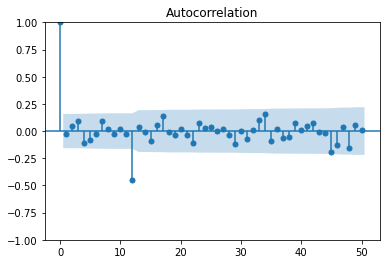

In [177]:
_ = sm.graphics.tsa.plot_acf(milk2['diff2'].dropna().values.squeeze(), lags=50)

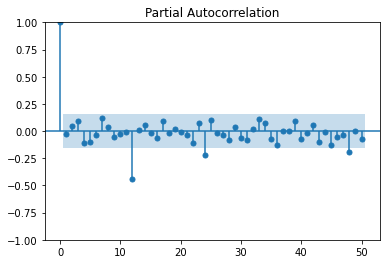

In [178]:
_ = sm.graphics.tsa.plot_pacf(milk2['diff2'].dropna().values.squeeze(), lags=50, method='ywm')